In [1]:
#this notebook generates a card image from an earlier model

import gpt_2_simple as gpt2
from PIL import Image, ImageFont, ImageDraw
import re

In [2]:
sess = gpt2.start_tf_sess()
gpt2.load_gpt2(sess, checkpoint = 'latest', run_name='run_2', checkpoint_dir = 'checkpoint')
gpt2.generate(sess, temperature=.7, length=15, top_k=40, nsamples=10, run_name= 'run_2', model_dir= 'models/124M')

Loading checkpoint checkpoint\run_2\model-300
INFO:tensorflow:Restoring parameters from checkpoint\run_2\model-300
The player whose turn it is loses 6 life.
Equipped creature gets
This spell costs {1} less to cast for each opponent.\n
[CARDNAME] enters the battlefield tapped and attacking.\n{
You gain 4 life.
At the beginning of your upkeep, you may
As you finish the text of your turn, you may reveal a card from
{T}: Add {C}.
{T}: Add {C}.
{U}, {T}, Sacrifice [CARDNAME]: Search your library
Your deck can have up to one additional creature card in all zones.\
Wardrobe 1 (Whenever this creature blocks or becomes blocked, that creature gets
As you begin the game, you may discard four cards. If you do


In [3]:
ten_cards = gpt2.generate(sess, temperature=.7, length=15, top_k=40, nsamples=10, run_name= 'run_2', model_dir= 'models/124M', return_as_list=True)

In [4]:
ten_cards

['Giant Insects are creatures you control. They get +1/+0',
 'Hexproof — As long as [CARDNAME] is untapped',
 'At the beginning of your upkeep, if you control a basic land card,',
 'This card is also blue. (Blue is the color of the cycle,',
 "At the beginning of each player's upkeep, [CARDNAME] deals",
 'Tempting offer\nCreatures you control get +1/+1 until',
 'Creature tokens you control get +2/+2.\nWhen [C',
 'Enchant creature\\nEnchanted creature can\'t block."\nWhenever a',
 'CARDNAME] enters the battlefield with X +1/+1 counters on',
 "First strike. If a player casts a spell this turn, that spell's"]

In [5]:
def generate_text(prompt):
    return gpt2.generate(sess, temperature=.7, prefix= prompt, length=45, top_k=40, nsamples=10, run_name= 'run_2', model_dir= 'models/124M', return_as_list=True)[0]
    

In [6]:
generate_text('[CARDNAME] deals x damage to')

"[CARDNAME] deals x damage to a creature that's attacking you.\n{1}, {T}: Return target creature card from your graveyard to the battlefield.\n{1}, {T}: Return target creature card from your graveyard to the battlefield.\nFlying"

# Making card image #

In [7]:
def card_image(color, card_name, cardtext, subtype, type, power, toughness, iscreature = False):
    if iscreature == True: 
        im = Image.open(f"{color}creature.png")
        title = ImageDraw.Draw(im)
        beleren = ImageFont.truetype('Beleren2016-bold.ttf', size = 35)
        #adding cardname
        title.text((48, 48), f'{card_name}', (0,0,0), font=beleren)
        #making rules text
        title.text((68, 525), f'{cardtext}', (0,0,0), font = ImageFont.truetype('Beleren2016-Bold.ttf', size= 20))
        #adding P/T
        title.text((467,717), f'{power}/{toughness}', (0,0,0),font = beleren )
        #adding type/subtype
        title.text((42,458), f'{type} - {subtype}', (0,0,0), font = beleren)
        return im
    else:
        im = Image.open(f"{color}.png")
        title = ImageDraw.Draw(im)
        beleren = ImageFont.truetype('Beleren2016-bold.ttf', size = 35)
        #adding cardname
        title.text((48, 48), f'{card_name}', (0,0,0), font=beleren)
        #making rules text
        title.text((68, 525), f'{cardtext}', (0,0,0), font = ImageFont.truetype('Beleren2016-Bold.ttf', size= 20))
        #no P/T for non creatures
        #adding type/subtype
        title.text((50,458), f'{type} - {subtype}', (0,0,0), font = beleren)
        return im



In [8]:
im = card_image(color= 'blue', card_name= 'wind drake', subtype= 'drake', type= 'creature', cardtext= generate_text('When [CARDNAME] enters the battelfield'), power= 2, toughness= 2, iscreature=True)

In [9]:
im.show()

In [10]:
#regex for new lines from https://stackoverflow.com/questions/2657693/insert-a-newline-character-every-64-characters-using-python
def new_lines(cutstring):
    return re.sub("(.{64})", "\\1\n", cutstring, 0, re.DOTALL)

In [11]:
def user_makes_card():
    power = 0
    toughness = 0
    color = input("What is the card's color?")
    name = input("What is the card's name?")
    subtype = input("What is the card's subtype?")
    creaturecheck = input("Is the card a creature[y/n]?")
    creaturebool = False
    if(creaturecheck == 'y'):
        creaturebool = True
        cardtype = 'Creature'
        power  = input("What is the card's power?")
        toughness = input("What is the card's toughness?")
    else:
        cardtype = input("What is the card's type?")
    return card_image(color= color, card_name= name, subtype= subtype, type= cardtype, cardtext= new_lines(generate_text(f'Counter')), power= power, toughness= toughness, iscreature=creaturebool)

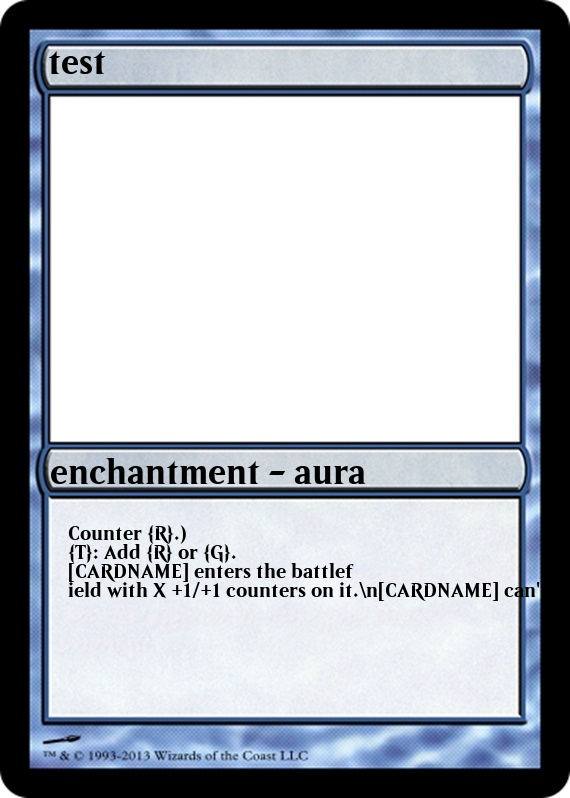

In [12]:
user_makes_card()